## <center>CO3234 Pattern Recognition Assignment-1</center> 

<center>by Siddhant Verma - 2K18/EC/167 
</center> 

In [1]:
import idx2numpy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import seaborn as sns


from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

### Dataset

In [2]:
!ls

BankNote_Authentication.csv  q1.ipynb		     t10k-labels.idx1-ubyte
pattern.ipynb		     q2.ipynb		     train-images.idx3-ubyte
pattern2.ipynb		     t10k-images.idx3-ubyte  train-labels.idx1-ubyte


+ Dataset downloaded from: http://yann.lecun.com/exdb/mnist/
+ Importing Dataset and converting them into readable (numpy array) format

In [3]:
train_images = idx2numpy.convert_from_file('./train-images.idx3-ubyte')
train_labels = idx2numpy.convert_from_file('./train-labels.idx1-ubyte')

test_images = idx2numpy.convert_from_file('./t10k-images.idx3-ubyte')
test_labels = idx2numpy.convert_from_file('./t10k-labels.idx1-ubyte')

### Data Exploration

Visualising data samples as grayscale images

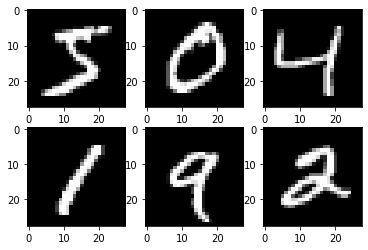

In [4]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(train_images[i], cmap='gray')

Data Exploration shows that the dataset contains images of digits 0-9

In [5]:
X = train_images
labels = np.unique(train_labels)
labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

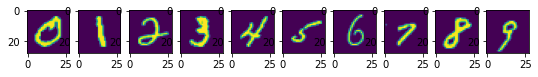

In [6]:
plt.figure(figsize= (9,9))

for i in labels:
    plt.subplot(1,10,i+1)
    img = np.array(X[train_labels == i][1:2]).reshape(28,28)
    plt.imshow(img)
    plt.savefig('all-digits.png')

### Data Splitting and Model Training

In [8]:
X_train = train_images.reshape(60000, 28*28)
Y_train = train_labels

X_test = test_images.reshape(10000, 28*28)
Y_test = test_labels

I have used sklearn to build the gaussian bayes classifier model

In [9]:
nb_model = GaussianNB()

In [10]:
fit_nb = nb_model.fit(X_train, Y_train)

In [11]:
def draw_confusionmatrix(ytest, yhat):
    plt.figure(figsize=(10,7))
    cm = confusion_matrix(ytest, yhat)
    ax = sns.heatmap(cm, annot=True, fmt="d")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
predictions = fit_nb.predict(X_test)
con_matrix = confusion_matrix(Y_test, predictions)

### Confusion Matrix

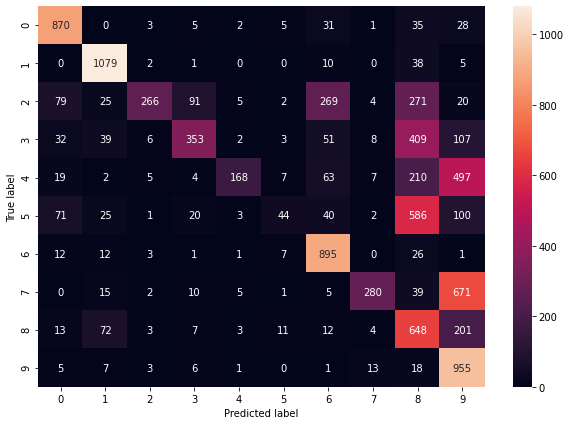

In [13]:
draw_confusionmatrix(Y_test, predictions)
plt.savefig('cm-entire-ds.png')

In [14]:
def diag_sum(conmat):
    sum =0
    for i in range(len(conmat)):
        for j in range(len(conmat[0])):
            if i == j:
                sum += conmat[i,j]
    return sum

In [15]:
accurate = diag_sum(con_matrix)
total = np.sum(con_matrix)
acc = accurate/total
print(f"accuracy = {accurate}/{total} = {acc*100}%")

accuracy = 5558/10000 = 55.58%


### Q1. a)  Design a classifier to distinguish between 0 and 1. 

Filtering Dataset as per requirements

In [43]:
X_train = train_images.reshape(60000, 28*28)
Y_train = train_labels

X_test = test_images.reshape(10000, 28*28)
Y_test = test_labels


train_filter = np.where((Y_train == 0 ) | (Y_train == 1))
test_filter = np.where((Y_test == 0) | (Y_test == 1))

In [44]:
X_train, Y_train = X_train[train_filter], Y_train[train_filter]
X_test, Y_test = X_test[test_filter], Y_test[test_filter]

Now the training and testing dataset only contains data for digits 0 and 1

In [45]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1]
[0 1]


In [47]:
X_test.shape

(2115, 784)

### Building the model

In [23]:
nb_model01 = GaussianNB()

In [24]:
fit_nb01 = nb_model01.fit(X_train, Y_train)

In [25]:
predictions01 = fit_nb01.predict(X_test)



con_matrix01 = confusion_matrix(Y_test, predictions01)

print(con_matrix01)

[[ 976    4]
 [  22 1113]]


### Confusion Matrix

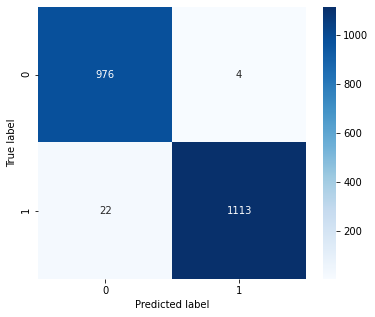

In [26]:
def draw_confusionmatrix(ytest, yhat):
    plt.figure(figsize=(6,5))
    cm = confusion_matrix(ytest, yhat)
    ax = sns.heatmap(cm, annot=True, fmt="d", cmap = "Blues")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

draw_confusionmatrix(Y_test, predictions01)
plt.savefig('cm-01.png')

### Q1. b) Compute classification accuracy using the predictions made by the model on testing dataset

In [27]:
accurate = diag_sum(con_matrix01)
total = np.sum(con_matrix01)
acc = accurate/total
print(f"accuracy = {accurate}/{total} = {acc*100}%")

accuracy = 2089/2115 = 98.77068557919621%


### Q1. c) Plot the ROC curve

In [28]:
from sklearn.metrics import roc_curve, plot_roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [29]:
probs = fit_nb01.predict_proba(X_test)
preds = probs[:,1]


fpr, tpr, threshold = roc_curve(Y_test, preds)


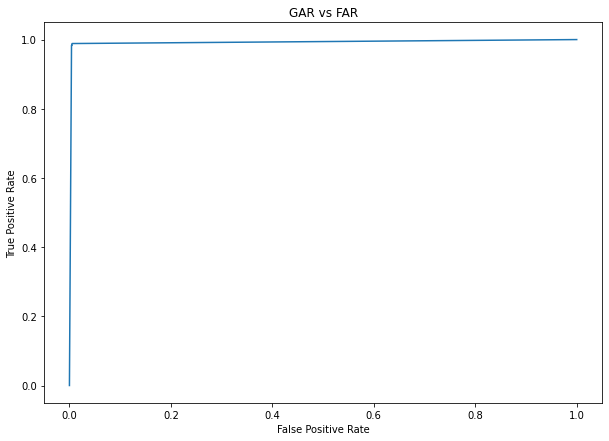

In [30]:
plt.figure(figsize=(10,7))
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('GAR vs FAR')

plt.savefig('roc01.png')

In [31]:
auc = roc_auc_score(Y_test, preds)
print(f"AUC: {auc*100}%")

AUC: 99.22030926908208%


### Q1. d) Repeat the same for digits 3 and 8

Filtering Data

In [32]:
X_train = train_images.reshape(60000, 28*28)
Y_train = train_labels

X_test = test_images.reshape(10000, 28*28)
Y_test = test_labels

train_filter = np.where((Y_train == 3 ) | (Y_train == 8))
test_filter = np.where((Y_test == 3) | (Y_test == 8))

In [33]:
X_train, Y_train = X_train[train_filter], Y_train[train_filter]
X_test, Y_test = X_test[test_filter], Y_test[test_filter]

In [34]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[3 8]
[3 8]


In [35]:
X_train.shape

(11982, 784)

In [36]:
nb_model38 = GaussianNB()
fit_nb38 = nb_model38.fit(X_train, Y_train)

In [37]:
predictions38 = fit_nb38.predict(X_test)
con_matrix38 = confusion_matrix(Y_test, predictions38)

print(Y_test)
print(con_matrix38)

[3 3 3 ... 3 8 3]
[[435 575]
 [ 22 952]]


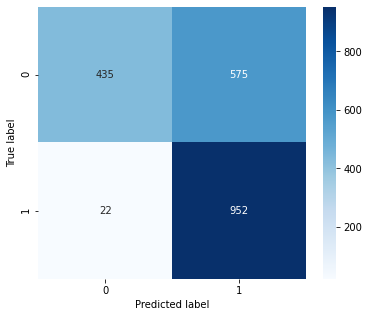

In [38]:
def draw_confusionmatrix(ytest, yhat):
    plt.figure(figsize=(6,5))
    cm = confusion_matrix(ytest, yhat)
    ax = sns.heatmap(cm, annot=True, fmt="d", cmap = "Blues")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

draw_confusionmatrix(Y_test, predictions38)
plt.savefig('cm38.png')

Accuracy

In [39]:
accurate = diag_sum(con_matrix38)
total = np.sum(con_matrix38)
acc = accurate/total
print(f"accuracy = {accurate}/{total} = {acc*100}%")

accuracy = 1387/1984 = 69.90927419354838%


In [40]:
probs = fit_nb38.predict_proba(X_test)
preds = probs[:,1]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Y_test)

fpr, tpr, threshold = roc_curve(y, preds)

ROC Curve

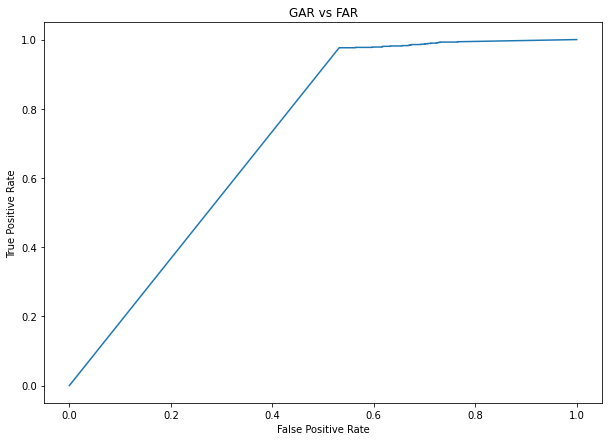

In [41]:
plt.figure(figsize=(10,7))
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('GAR vs FAR')

plt.savefig('roc38.png')

In [42]:
auc = roc_auc_score(y, preds)
print(f"AUC: {auc*100}%")

AUC: 72.32261573179903%
